# Quality assessment: Greenland ice sheet annual gridded velocity data from 2017 to present derived from satellite observations

### Use Case: Monitoring Greenland ice sheet surface ice flow velocity patterns for glaciological purposes, such as ice discharge modeling

### Use Question: Is the dataset of sufficient spatial/temporal resolution and coverage to derive multi-year trends and the intra/interannual variability of horizontal surface flow velocities and the associated patterns of ice discharge?

This script summarizes the scientific quality assessment provided for the C3S_520 service regarding surface ice velocity data (IV) for the Greenland Ice Sheet (GrIS) as they are available on the CDS (Climate Data Store) [version 1.3]. Data for the Antarctic Ice Sheet (AIS) are at this moment not provided. 

## General description

The ice of ice sheets is not static, but instead flows. The primary cause of this dynamical process is the internal deformation of ice in response to gravity. As a consequence, stresses cause the ice to flow downslope under its own weight. The total velocity magnitude is the sum of the velocity related to internal ice deformation, and is complemented by basal sliding and bed deformation components.

Remote sensing techniques, such as the use of satellites, are an important feature to derive and study the surface flow velocities of the ice sheets. These devices are able to inspect directly and repeatedly large areas of ice, and, as such are able to detect the movement of its surface features. Remote sensing techniques that use satellite data are therefore considered the only feasible manner to derive accurate surface velocities of the ice sheets on a regular basis. To derive the surface flow velocities that are on the CDS, Synthetic Aperture Radar (SAR) feature tracking methods have been used. The main principle relies on the preservation of surface features (such as boulders, debris patterns or crevasses) in between multiple image acquisition periods. The extraction of these features from images acquired over different time periods is used to detect their displacement and further processing of these data transforms this information into velocity fields (Nagler et al., 2015). The velocity data can, for example, be used to calculate solid ice discharge, i.e. the ice flux across the grounding line, which is an important component of the mass balance of the grounded ice sheet. The used data acquisition techniques, however, also have their limitations (e.g. Paul et al., 2017; Lüttig et al., 2017), as will be explored here, of which the user should take note before using the product. 

Mapping ice sheet flow velocity and its temporal changes provides key information for investigating the dynamic response of glaciers and ice sheets to climate change. High-quality products are desired to accurately assess and understand the current general state, as well as the climate change impact on the ice sheets. Moreover, data maturity and a high-quality IV Essential Climate Variable (ECV) are evidently important. In that regard, the IV data seem to be well suited for multiple applications and have already been used e.g. for velocity estimates an sich (Nagler et al., 2015), as a data assimilation tool into an ice sheet modelling framework (Mottram et al., 2019), for ice discharge and dynamically induced ice mass loss calculations (Mankoff et al., 2020), and for ice drainage basin delineation (Krieger et al., 2020).

## Setup and retrieval

#### Let us first load the required packages

Here, we will load all packages that are needed to run the code.

In [1]:
import netCDF4 as nc
import cdsapi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
import zipfile
import pyproj
import math
import warnings

#### Set the data request

We set up the data request to download the data from the CDS.

In [22]:
c = cdsapi.Client()

c.retrieve(
    'satellite-greenland-ice-sheet-velocity',
    {
        'variable': 'all',
        'format': 'zip',
        'version': '1.3',
        'period': [
            '2017_2018', '2018_2019', '2019_2020',
        ],
    },
    'download.zip')

2023-10-13 15:15:50,225 INFO Welcome to the CDS
2023-10-13 15:15:50,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-greenland-ice-sheet-velocity
2023-10-13 15:15:50,291 INFO Request is queued
2023-10-13 15:15:51,345 INFO Request is running
2023-10-13 15:17:44,248 INFO Request is completed
2023-10-13 15:17:44,249 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-satellite-greenland-ice-sheet-velocity-138767ec-d772-48a6-abc9-7637d7e1fb63.zip to download.zip (1.9G)
2023-10-13 15:23:09,562 INFO Download rate 5.9M/s                               


Result(content_length=2001544909,content_type=application/zip,location=https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-satellite-greenland-ice-sheet-velocity-138767ec-d772-48a6-abc9-7637d7e1fb63.zip)

#### Unpack the downloaded data

Now that the data are downloaded, we can extract them out of the NetCDF file.

In [23]:
files = glob.glob('/Users/yoniverhaegen/download.zip')
files
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('/Users/yoniverhaegen/')

Unzipping: /Users/yoniverhaegen/download.zip


In [4]:
# Dataset 1 (= 2019-2020)
dataset = nc.Dataset('/Users/yoniverhaegen/C3S_GrIS_IV_250m_S1_20191001_20200930_v1_3.nc')
# Dataset 2 (= 2018-2019)
dataset2 = nc.Dataset('/Users/yoniverhaegen/C3S_GrIS_IV_250m_S1_20181001_20190930_v1_3.nc')
# Dataset 3 (= 2017-2018)
dataset3 = nc.Dataset('/Users/yoniverhaegen/C3S_GrIS_IV_250m_S1_20171001_20180930_v1_3.nc')

#### Extract the horizontal land ice surface velocity magnitude

Now we can extract the annually averaged horizontal velocity values. These data have units in m/day and cover the entire ice sheet.

In [5]:
# Dataset 1
lisvm = dataset['land_ice_surface_velocity_magnitude'][:]
lisvm.data
lisvm = np.where(lisvm > 1000, np.nan, lisvm)
# Dataset 2
lisvm2 = dataset2['land_ice_surface_velocity_magnitude'][:]
lisvm2.data
lisvm2 = np.where(lisvm2 > 1000, np.nan, lisvm2)
# Dataset 3
lisvm3 = dataset3['land_ice_surface_velocity_magnitude'][:]
lisvm3.data
lisvm3 = np.where(lisvm3 > 1000, np.nan, lisvm3)

#### Extract the valid pixel count map

Now we can extract the valid pixel count values and its spatial distribution.

In [6]:
# Dataset 1
lisvm_mc = dataset['land_ice_surface_measurement_count'][:]
lisvm_mc.data
lisvm_mc = np.where(lisvm_mc < 1, np.nan, lisvm_mc)
# Dataset 2
lisvm_mc2 = dataset2['land_ice_surface_measurement_count'][:]
lisvm_mc2.data
lisvm_mc2 = np.where(lisvm_mc2 < 1, np.nan, lisvm_mc2)
# Dataset 3
lisvm_mc3 = dataset3['land_ice_surface_measurement_count'][:]
lisvm_mc3.data
lisvm_mc3 = np.where(lisvm_mc3 < 1, np.nan, lisvm_mc3)

#### We can do the same for the standard deviation

In this case, we have to calculate the standard deviations because only the northing and easting components are given. We do this by the square root of the sum of the squared of the components: $σ_V = \sqrt{(σ_x)^2+(σ_y)^2}$

In [7]:
# Dataset 1
lisvm_std1 = dataset['land_ice_surface_easting_stddev'][:]
lisvm_std1.data
lisvm_std2 = dataset['land_ice_surface_northing_stddev'][:]
lisvm_std2.data
warnings.filterwarnings('ignore')
lisvm_std = np.sqrt(lisvm_std1.data**2 + lisvm_std2.data**2)
lisvm_std.data
warnings.filterwarnings('ignore')
# Dataset 2
lisvm2_std1 = dataset2['land_ice_surface_easting_stddev'][:]
lisvm2_std1.data
lisvm2_std2 = dataset2['land_ice_surface_northing_stddev'][:]
lisvm2_std2.data
warnings.filterwarnings('ignore')
lisvm2_std = np.sqrt(lisvm2_std1.data**2 + lisvm2_std2.data**2)
lisvm2_std.data
warnings.filterwarnings('ignore')
# Dataset 3
lisvm3_std1 = dataset3['land_ice_surface_easting_stddev'][:]
lisvm3_std1.data
lisvm3_std2 = dataset3['land_ice_surface_northing_stddev'][:]
lisvm3_std2.data
warnings.filterwarnings('ignore')
lisvm3_std = np.sqrt(lisvm3_std1.data**2 + lisvm3_std2.data**2)
lisvm3_std.data
warnings.filterwarnings('ignore')

## Results and discussion

#### We can now finally plot the velocity data 

At last, the horizontal surface velocity data are ready to be plotted. No additional processing of the data has been peformed. Since the dataset is quite extensive, it could take some time to load the complete figure.

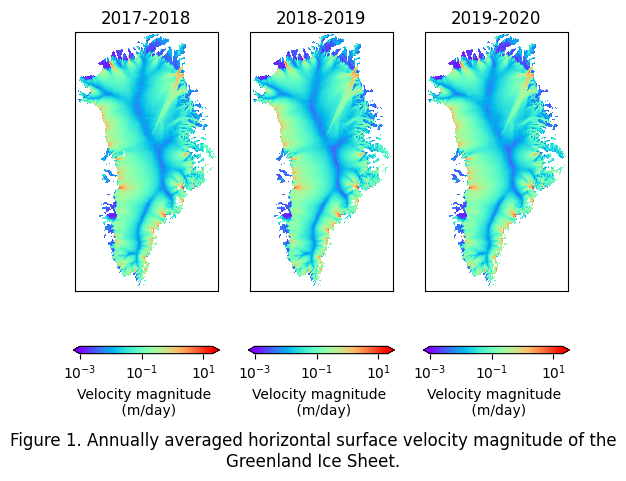

In [8]:
fig=plt.figure()
txt="Figure 1. Annually averaged horizontal surface velocity magnitude of the Greenland Ice Sheet."
plt.figtext(0.5, -0.02,txt, wrap=True, horizontalalignment='center', fontsize=12)
# Right most
plt.subplot(1, 3, 3)
imgplot = plt.imshow(lisvm.data, cmap='rainbow',norm = colors.LogNorm())
c = plt.colorbar(orientation='horizontal',extend='both')
plt.clim(1e-3, 20)
ax = plt.gca()
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2019-2020')
c.set_label('Velocity magnitude \n (m/day)')
# Middle
plt.subplot(1, 3, 2)
imgplot = plt.imshow(lisvm2.data, cmap='rainbow',norm = colors.LogNorm())
c = plt.colorbar(orientation='horizontal',extend='both')
plt.clim(1e-3, 20)
ax = plt.gca()
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2018-2019')
c.set_label('Velocity magnitude \n (m/day)')
# Left most
plt.subplot(1, 3, 1)
imgplot = plt.imshow(lisvm3.data, cmap='rainbow',norm = colors.LogNorm())
c = plt.colorbar(orientation='horizontal',extend='both')
plt.clim(1e-3, 20)
ax = plt.gca()
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2017-2018')
c.set_label('Velocity magnitude \n (m/day)')

Surface flow velocities are here in fact regarded as “displacements” and the calculation of the Cartesian velocity components is performed within a fixed reference frame, where the horizontal components (easting $V_x$ and northing $V_y$) and the corresponding magnitude of the horizontal surface velocity vector V is $V = \sqrt{(V_x)^2+(V_y)^2}$.

The corresponding data are considered annually averaged values, and are hence derived from all-year round observations during the glaciological balance year. The annually averaged nature of the data meets the minimum requirement for GCOS (Global Climate Observing System), but also limits the potential usage in research if e.g. seasonal data are desired. It also makes it harder to compare the IV to external datasets with full temporal overlap. The temporal extent of the data is furthermore limited and only comprises a few years, which limits the analysis of means, variability and trends of the surface velocities and/or derived parameters such as ice discharge. The dataset shows no temporal or spatial (as they are filled up by interpolation) data gaps and is presented as gridded values at a spatial resolution of 250 meter (for version 1.3). Spatially filled gaps are not flagged and hence not detectable. The spatial coverage of the data is thus 100% and encompasses the entire ice sheet, including peripheral glaciers and ice caps and thus meets the minimum requirement of GCOS (World Meteorological Organization, 2022). 

The horizontal velocity data show the interior low-flow zones and the increased velocities near the ice sheet’s margins and its outlet glaciers, which is in line with other GrIS velocity maps in the literature. 

#### We can also zoom into the interior parts of the ice sheet to inspect the velocity pattern in more detail

In this case, we will zoom in onto a random part of the interior of the ice sheet from the 2017-2018 dataset.

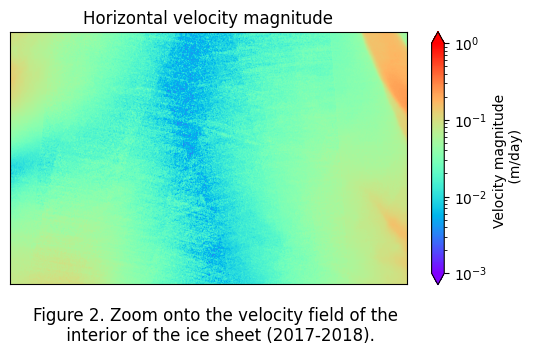

In [9]:
fig=plt.figure();
txt="Figure 2. Zoom onto the velocity field of the \n interior of the ice sheet (2017-2018).";
plt.figtext(0.45, 0.12,txt, wrap=True, horizontalalignment='center', fontsize=12);
imgplot = plt.imshow(lisvm3.data, cmap='rainbow',norm = colors.LogNorm());
c = plt.colorbar(shrink=0.685,extend='both');
c.set_label('Velocity magnitude \n (m/day)')
plt.clim(1e-3, 1);
ax = plt.gca();
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Horizontal velocity magnitude');
plt.xlim([1600, 3800]);
plt.ylim([2000, 3400]);

From the above plot, it becomes clear that low-velocity zones in the interior of the GrIS allow the noisy character of the acquired data to become clearly identifiable by visual inspection (i.e. ‘striping’), which is due to atmospheric disturbances. This unrealistic striping in the interior of the ice sheet may limit the use of the product for slowly moving ice and is therefore important to consider when using the data.

#### Let us find out a bit more about the data uncertainty and its spatial distribution

Error assessment is represented by surface velocity standard deviation and by valid pixel count maps. Consulting these data is important, as the used IV-retrieval methods are sensitive to all sources, other than actual displacement, that may contribute to false movement detection between two acquisitions (e.g. atmospheric disturbances, geometric transformations of acquired images, etc.). As such, by means of error characterization, the valid measurement count maps (the total number of valid pixels used in the velocity estimate) and uncertainty maps (the standard deviation of the velocity magnitude) should be consulted.

#### Let us first plot the valid pixel count data

Again, we plot the data of the entire ice sheet.

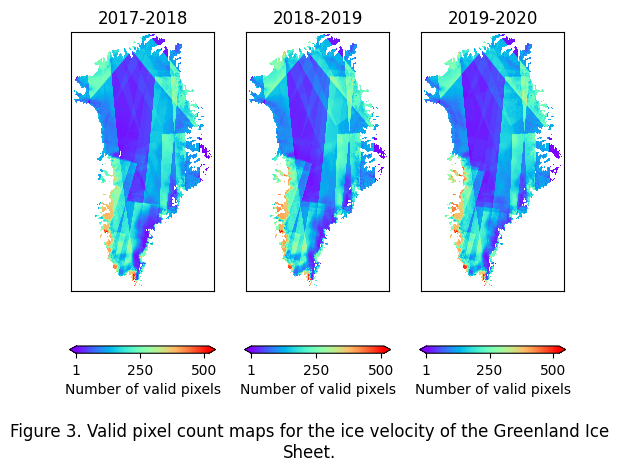

In [10]:
fig=plt.figure()
txt="Figure 3. Valid pixel count maps for the ice velocity of the Greenland Ice Sheet."
plt.figtext(0.5, 0.0,txt, wrap=True, horizontalalignment='center', fontsize=12)
# Right most
plt.subplot(1, 3, 3)
imgplot = plt.imshow(lisvm_mc.data, cmap='rainbow')
c = plt.colorbar(orientation='horizontal',ticks=[1, 250, 500],extend='both')
ax = plt.gca()
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2019-2020')
c.set_label('Number of valid pixels')
# Middle
plt.subplot(1, 3, 2)
imgplot = plt.imshow(lisvm_mc2.data, cmap='rainbow')
c = plt.colorbar(orientation='horizontal',ticks=[1, 250, 500],extend='both')
ax = plt.gca()
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2018-2019')
c.set_label('Number of valid pixels')
# Left most
plt.subplot(1, 3, 1)
imgplot = plt.imshow(lisvm_mc3.data, cmap='rainbow')
c = plt.colorbar(orientation='horizontal',ticks=[1, 250, 500],extend='both')
ax = plt.gca()
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2017-2018')
c.set_label('Number of valid pixels')

The valid pixel count (the total number of pixels used in the annually averaged velocity estimate) shows a high spatial variation, with the lowest values mostly, but not only, found in high accumulation areas such as southeastern Greenland and the interior of the ice sheet (i.e. where identifying and tracking visible features is harder). Hence, it can be argued that the valid pixel count is generally less over accumulation areas (where positive local mass balances prevail), although the relationship is not one to one. Furthermore, there is no information given related to the time of the year during which valid pixels were acquired. The plots above look quite similar for each distinctive year. However, when calculating the mean valid pixel count for each year, some small differences appear:

In [16]:
print(f'The mean valid pixel count for 2017-2018 is {np.nanmean(lisvm_mc3.data):.1f}','pixels.')
print(f'The mean valid pixel count for 2018-2019 is {np.nanmean(lisvm_mc2.data):.1f}','pixels.')
print(f'The mean valid pixel count for 2019-2020 is {np.nanmean(lisvm_mc.data):.1f}','pixels.')

The mean valid pixel count for 2017-2018 is 133.6 pixels.
The mean valid pixel count for 2018-2019 is 138.1 pixels.
The mean valid pixel count for 2019-2020 is 136.8 pixels.


#### Let us investigate the standard deviation for the velocity data

At last, the horizontal surface velocity standard deviation data are ready to be plotted. No additional processing of the data has been peformed. Again, since the dataset is quite extensive, it could take some time to load the complete figure.

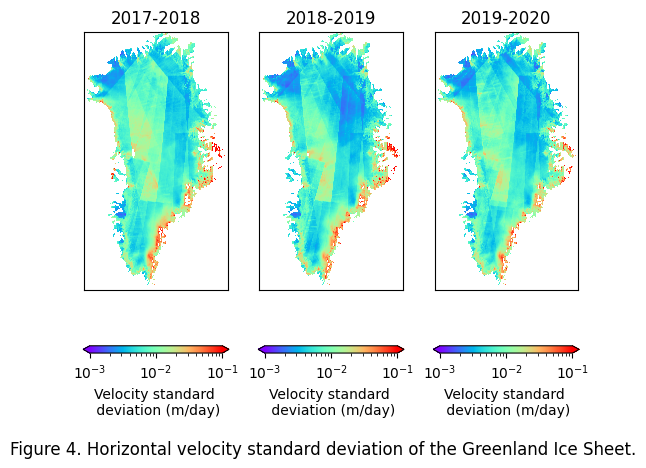

In [17]:
fig=plt.figure()
txt="Figure 4. Horizontal velocity standard deviation of the Greenland Ice Sheet."
plt.figtext(0.5, 0.0,txt, wrap=True, horizontalalignment='center', fontsize=12)
# Right most
plt.subplot(1, 3, 3)
imgplot = plt.imshow(lisvm_std.data, cmap='rainbow',norm = colors.LogNorm())
c = plt.colorbar(orientation='horizontal',extend='both')
ax = plt.gca()
plt.clim(1e-3, 0.1)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2019-2020')
c.set_label('Velocity standard \n deviation (m/day)')
# Middle
plt.subplot(1, 3, 2)
imgplot = plt.imshow(lisvm2_std.data, cmap='rainbow',norm = colors.LogNorm())
c = plt.colorbar(orientation='horizontal',extend='both')
ax = plt.gca()
plt.clim(1e-3, 0.1)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2018-2019')
c.set_label('Velocity standard \n deviation (m/day)')
# Left most
plt.subplot(1, 3, 1)
imgplot = plt.imshow(lisvm3_std.data, cmap='rainbow',norm = colors.LogNorm())
c = plt.colorbar(orientation='horizontal',extend='both')
ax = plt.gca()
plt.clim(1e-3, 0.1)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('2017-2018')
c.set_label('Velocity standard \n deviation (m/day)')

When plotted, the standard deviation of the IV product is shown to exhibit large spatial variability, with higher values generally noticed near the margins. Here, high terrain complexity and rapidly changing surface conditions (e.g. high ice melt and high firn compaction rates) are to be taken into account (e.g. Paul et al., 2017). Also the shorter response time of rapidly flowing outlet glaciers may contribute to higher standard deviations in these areas. More towards the interior of the ice sheet, where there is little or no melt and speeds do not vary significantly, the standard deviation is relatively low. The images above look quite similar for each distinctive year. However, when calculated the mean valid pixel count for each year, some small differences appear:

In [20]:
print(f'The mean standard deviation for 2017-2018 is {np.nanmean(lisvm3_std[np.isfinite(lisvm3_std.data)]):.4f}','m/day.')
print(f'The mean standard deviation for 2018-2019 is {np.nanmean(lisvm2_std[np.isfinite(lisvm2_std.data)]):.4f}','m/day.')
print(f'The mean standard deviation for 2019-2020 is {np.nanmean(lisvm_std[np.isfinite(lisvm_std.data)]):.4f}','m/day.')

The mean standard deviation for 2017-2018 is 0.0126 m/day.
The mean standard deviation for 2018-2019 is 0.0108 m/day.
The mean standard deviation for 2019-2020 is 0.0098 m/day.


These values meet the minimum requirements proposed by GCOS, with a minimum threshold of 100 m yr^-1 and an optimal accuracy of 10 m yr^-1 (World Meteorological Organization, 2022). The link between the surface velocity magnitude and its standard deviation is further illustrated below, where it can be seen that fast-flowing areas and their rapidly changing surface conditions correspond to overall higher standard deviations, while in the low-flow zones of the ice sheet, the corresponding overall standard deviation is relatively low (for example for the 2019-2020 year):

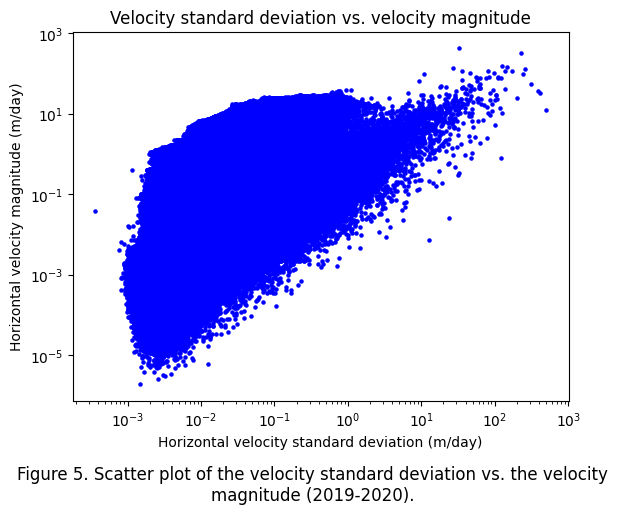

In [21]:
fig=plt.figure()
txt="Figure 5. Scatter plot of the velocity standard deviation vs. the velocity magnitude (2019-2020).";
plt.figtext(0.5, -0.09,txt, wrap=True, horizontalalignment='center', fontsize=12);
plt.scatter(lisvm_std, lisvm,s=5,c='blue')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("Horizontal velocity standard deviation (m/day)")
plt.ylabel("Horizontal velocity magnitude (m/day)")
plt.title("Velocity standard deviation vs. velocity magnitude")
plt.show()

## Conclusion

#### Key strengths and key weaknesses

<u>Key strengths:</u>

• The data have no temporal nor spatial (as they are filled by interpolation) data gaps. Also
peripheral glaciers and ice caps are included.<br>
• Data include quantitative error and uncertainty characterization measures in the form of
gridded standard deviations and valid pixel count data.<br>
• The spatial resolution, temporal resolution, the average accuracy, and the number of observations
required all satisfy the minimum GCOS requirements (World Meteorological Organization, 2022).<br>
• There is an abundant amount of guidance/help documents that are regularly updated
and are freely and publicly available through the CDS or ESA-CCI.<br>
• The data files are accompanied by extensive metadata that meet international standards
and provide the user with additional information.<br>
• Data have been used in peer-reviewed research for various purposes (e.g. Mottram et al.,
2019; Krieger et al., 2020; Mankoff et al., 2020).

<u>Key weaknesses:</u>

• The temporal extent of the data is limited and only comprises a few years, which limits the
analysis of means, variability and trends (climate change signals) of the surface velocities and/or derived
parameters such as ice discharge. <br>
• Data on the CDS are annually averaged values, which limits the potential usage in research
if e.g. seasonal data are desired. It also makes it harder to compare the IV to external
datasets with full temporal overlap.<br>
• Products contain striping in slow flow areas. Other potential areas of lesser data quality are the ice sheet margins (i.e. higher standard deviations) and the accumulation zones (i.e. lower valid pixel counts).<br>
• Spatially filled gaps are not flagged and hence not detectable. Furthermore, there is no
information given related to the time of the year during which valid pixels were acquired.<br>

#### Take-home messages

Ice flow velocity ("displacement") detection by satellites is a useful tool to grasp the impact of climate change on the ice sheets. When using the IV data for the GrIS, users should, however, be aware of the "problem areas" for SAR-based remote sensing-derived IV products. Consulting the accompanying standard deviation (as an accuracy estimate) and valid pixel count maps (as the total number of valid measurements used in the velocity estimate over 1 year of data acquisition) is therefore recommended to assess the error and uncertainty characterization of the product. 

Although the spatial data coverage is 100%, some typical problem areas for SAR-derived velocities can still be identified within the IV fields. These are the ice sheet margins (e.g. due to complex terrain and rapidly changing surface conditions, with ice melting, high firn compaction rates, fast flowing glaciers, etc.), interior low-velocity zones (e.g. where ‘striping’ due to atmospheric disturbances may occur), and high accumulation areas (e.g. due to difficulties with identifying and tracking moving objects). In these areas, relatively low valid pixel counts and/or relatively high standard deviation values prevail, such that the velocity estimates in these areas are of lower data quality. As such, by means of an error characterization, the valid measurement count maps (the total number of valid pixels used in the velocity estimate) and uncertainty maps (the standard deviation of the velocity magnitude) should be consulted before proper usage of the IV data.

The GrIS ice sheet-wide IV products are at this stage found to be less suitable to derive long-term mean values, variability and trends (climate change signals), as (1) data are presented at no finer temporal resolution than annually averaged products, and (2) the number of consecutive years is too small to filter out variability and derive reliable conclusions. The annually averaged nature and the short temporal extent of the data limit the number of potential use cases in research and literature. However, the IV data seem to be well suited for multiple applications and have already been used e.g. as a data assimilation tool into an ice sheet modelling framework (Mottram et al., 2019), for ice discharge and dynamically-induced ice mass loss calculations (Mankoff et al., 2020), and for ice drainage basin delineation (Krieger et al., 2020). Overall, the conclusion is that GrIS IV data that are on the CDS appear as mature products, although some improvements can still be made.

## References

Krieger, L., Floricioiu, D., and Neckel, N. (2020). Drainage basin delineation for outlet glaciers of
Northeast Greenland based on Sentinel-1 ice velocities and TanDEM-X elevations, Remote
Sensing of Environment, 237, 111483. https://doi.org/10.1016/j.rse.2019.111483.

Lüttig, C., Neckel, N., and Humbert, A. (2017). A Combined Approach for Filtering Ice Surface
Velocity Fields Derived from Remote Sensing Methods, Remote Sensing, 9(10).
https://doi.org/10.3390/rs9101062.

Mankoff, K.D., Solgaard, A., Colgan, W., Ahlstrøm, A.P., Khan, S.A., and Fausto, R.S. (2020).
Greenland Ice Sheet solid ice discharge from 1986 through March 2020, Earth System Science
Data, 12, 1367–1383. https://doi.org/10.5194/essd-12-1367-2020.

Mottram, R.B., Simonsen, S., Høyer Svendsen, S., Barletta, V.R., Sandberg Sørensen, L., Nagler,
T., Wuite, J., Groh, A., Horwath, M., Rosier, J., Solgaard, A., Hvidberg, C.S., and Forsberg, R. (2019).
An Integrated View of Greenland Ice Sheet Mass Changes Based on Models and Satellite
Observations, Remote Sensing, 11(12). https://doi.org/10.3390/rs11121407.

Nagler, T., Rott, H., Hetzenecker, M., Wuite, J. and Potin, P. (2015). The Sentinel-1 Mission: New
Opportunities for Ice Sheet Observations. Remote Sensing. 7(7):9371-9389.
https://doi.org/10.3390/rs70709371.

Paul, F., Bolch, T., Briggs, K., Kääb, A., McMillan, M., McNabb, R., Nagler, T., Nuth, C., Rastner, P.,
Strozzi, T., and Wuite, J. (2017). Error sources and guidelines for quality assessment of glacier
area, elevation change, and velocity products derived from satellite data in the Glaciers_cci
project, Remote Sensing of Environment, 203, 256-275.
https://doi.org/10.1016/j.rse.2017.08.038.

World Meteorological Organization (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. 